In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [12]:
merged_df = pd.read_csv('../Data/merged.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='mixed', dayfirst=True, errors='coerce')
merged_df = merged_df.sort_values(["Symbol", "Date"])

merged_df.head()

,Symbol,GICS Sector,Headquarters Location,Founded,Date,Close,Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,...,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Close_lag6,Close_lag7,Close_lag8,Close_lag9,Close_lag10,Profit
0,A,Health Care,"Santa Clara, California",1999,2020-10-15,105.320000,723000,1.0,0.0,0.0,...,105.419998,105.430000,105.760002,104.160004,103.879997,101.629997,103.120003,100.010002,101.220001,1
1,A,Health Care,"Santa Clara, California",1999,2020-10-16,106.699997,1039400,0.0,0.0,1.0,...,105.059998,105.419998,105.430000,105.760002,104.160004,103.879997,101.629997,103.120003,100.010002,1
2,A,Health Care,"Santa Clara, California",1999,2020-10-19,105.489998,636000,0.0,0.0,1.0,...,105.320000,105.059998,105.419998,105.430000,105.760002,104.160004,103.879997,101.629997,103.120003,0
3,A,Health Care,"Santa Clara, California",1999,2020-10-20,105.610001,771000,2.0,0.0,0.0,...,106.699997,105.320000,105.059998,105.419998,105.430000,105.760002,104.160004,103.879997,101.629997,1
4,A,Health Care,"Santa Clara, California",1999,2020-10-21,104.830002,894000,0.0,0.0,0.0,...,105.489998,106.699997,105.320000,105.059998,105.419998,105.430000,105.760002,104.160004,103.879997,0


In [13]:
lag_cols   = [f"Close_lag{k}" for k in range(1, 11)]
news_cols  = [c for c in merged_df.columns if c.startswith("News -")]
num_features  = lag_cols + ["Volume"] + news_cols      

merged_df = pd.get_dummies(merged_df, columns=["GICS Sector"], drop_first=True, dtype="int")

sector_dummies = [c for c in merged_df.columns if c.startswith("GICS Sector_")]
feature_cols   = num_features + sector_dummies

cutoff_date = merged_df["Date"].quantile(0.8)

train = merged_df[merged_df["Date"] <= cutoff_date]
test  = merged_df[merged_df["Date"]  > cutoff_date]

X_train, y_train = train[feature_cols], train["Profit"]
X_test,  y_test  = test [feature_cols], test ["Profit"]

In [15]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score (y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

roc_auc   = roc_auc_score  (y_test, y_pred_proba)
print(f"ROC-AUC  : {roc_auc:.4f}")

coef_table = pd.Series(model.coef_[0], index=feature_cols)
print("\nLogistic-regression coefficients:")
print(coef_table.round(5))

Accuracy : 0.4900
ROC-AUC  : 0.4952

Logistic-regression coefficients:
Close_lag1                            0.00001
Close_lag2                            0.00001
Close_lag3                            0.00001
Close_lag4                            0.00001
Close_lag5                            0.00001
Close_lag6                            0.00001
Close_lag7                            0.00001
Close_lag8                            0.00001
Close_lag9                            0.00001
Close_lag10                           0.00001
Volume                                0.00000
News - Positive Sentiment             0.00000
News - Negative Sentiment            -0.00000
News - New Products                   0.00000
News - Layoffs                        0.00000
News - Analyst Comments               0.00000
News - Stocks                         0.00000
News - Dividends                      0.00000
News - Corporate Earnings             0.00000
News - Mergers & Acquisitions         0.00000
News - St

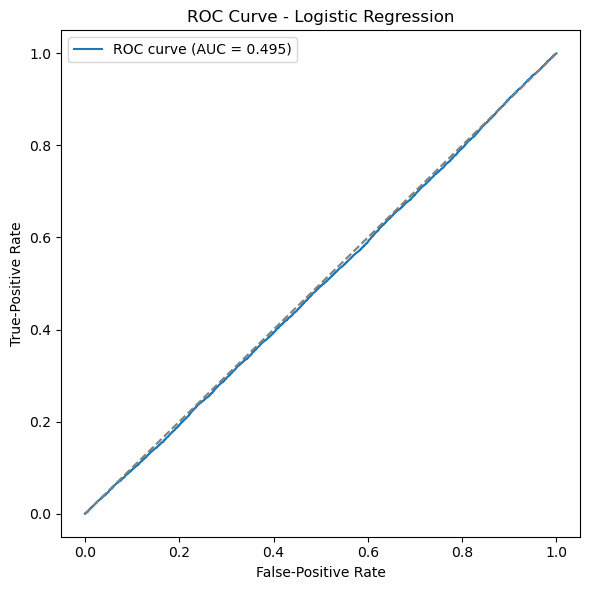

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Try using AAPL only
aapl = merged_df[merged_df['Symbol'] == 'AAPL'].copy()

lag_cols  = [f"Close_lag{k}" for k in range(1, 11)]

cutoff_date = aapl["Date"].quantile(0.8)

train = aapl[aapl["Date"] <= cutoff_date]
test  = aapl[aapl["Date"]  > cutoff_date]

X_train, y_train = train[feature_cols], train["Profit"]
X_test,  y_test  = test [feature_cols], test ["Profit"]

In [20]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy  = accuracy_score (y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

roc_auc   = roc_auc_score  (y_test, y_pred_proba)
print(f"ROC-AUC  : {roc_auc:.4f}")

coef_table = pd.Series(model.coef_[0], index=feature_cols)
print("\nLogistic-regression coefficients:")
print(coef_table.round(5))

Accuracy : 0.5349
ROC-AUC  : 0.5289

Logistic-regression coefficients:
Close_lag1                           -0.00041
Close_lag2                           -0.00029
Close_lag3                           -0.00004
Close_lag4                            0.00040
Close_lag5                            0.00036
Close_lag6                            0.00045
Close_lag7                            0.00043
Close_lag8                            0.00039
Close_lag9                            0.00047
Close_lag10                           0.00059
Volume                               -0.00000
News - Positive Sentiment             0.00443
News - Negative Sentiment            -0.00180
News - New Products                  -0.00439
News - Layoffs                        0.00030
News - Analyst Comments               0.00436
News - Stocks                         0.00428
News - Dividends                      0.00016
News - Corporate Earnings            -0.00264
News - Mergers & Acquisitions        -0.00013
News - St

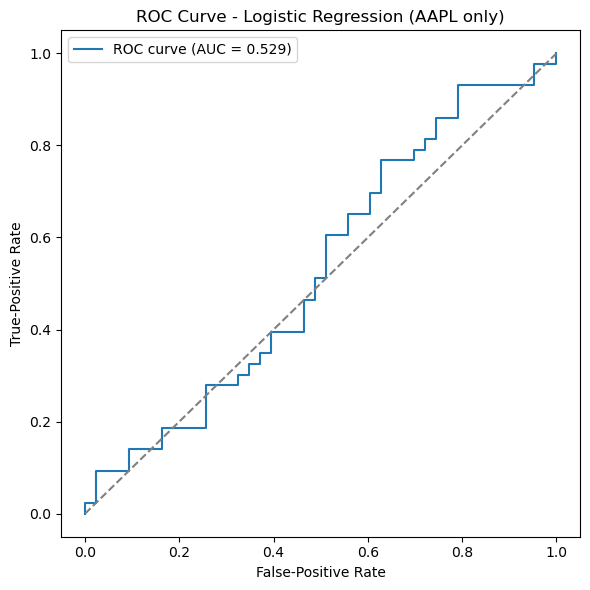

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve - Logistic Regression (AAPL only)")
plt.legend()
plt.tight_layout()
plt.show()